In [1]:
import numpy as np
import pandas as pd
import math


In [2]:
data = pd.read_csv('/Users/karanbhutani/Downloads/housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

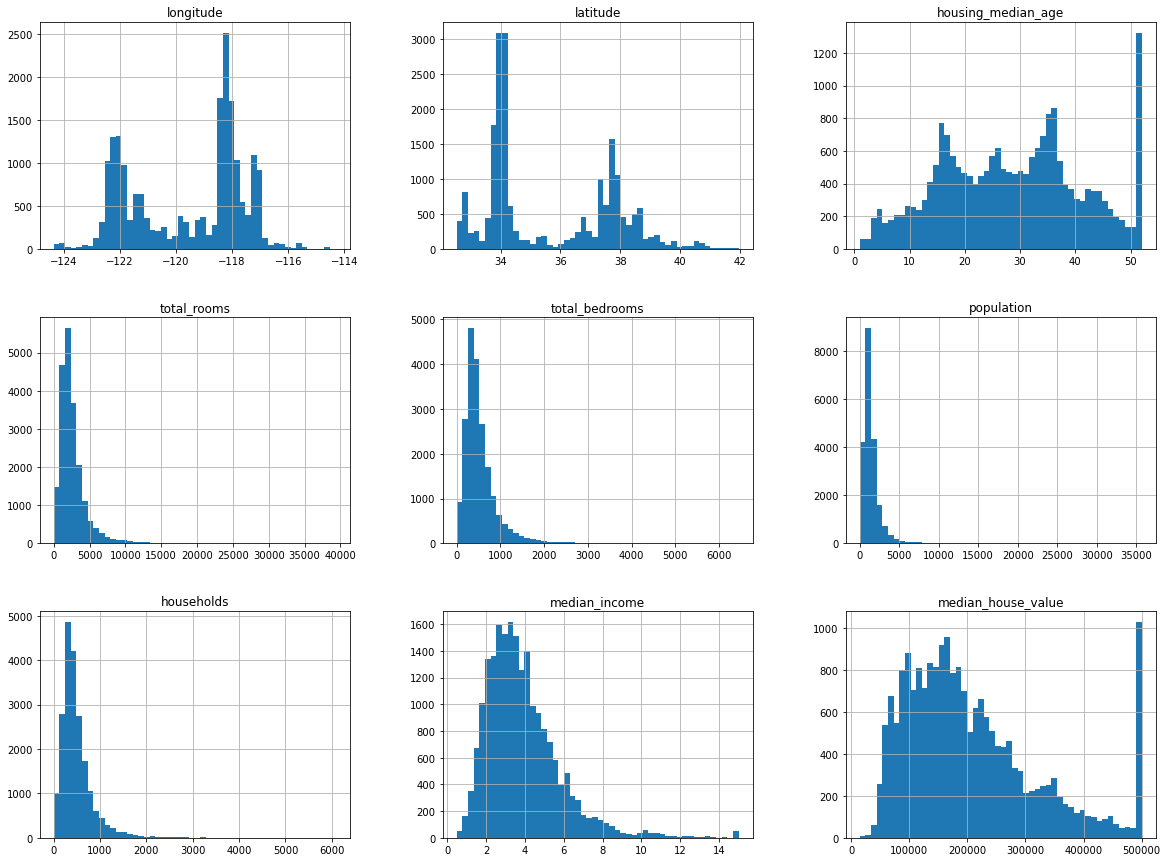

In [7]:
data.hist(bins=50, figsize=(20,15))
plt.show

## created income categories because median income is a continous numerical attribute, you first need to create an income category attribute

In [8]:
data["income_cat"]= pd.cut(data["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1, 2, 3, 4, 5])


<AxesSubplot:>

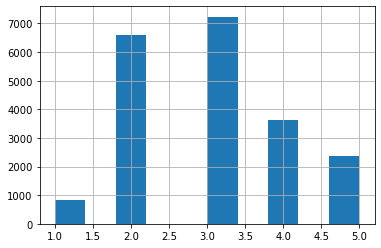

In [9]:
data["income_cat"].hist()

In [10]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
train_set, test_set = split_train_test(data, 0.2)
len(train_set)
len(test_set)

4128

In [12]:
len(test_set)

4128

In [13]:
len(train_set)

16512

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [16]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [18]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


## visualizing geographical data 

In [19]:
data = strat_train_set.copy()

In [20]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

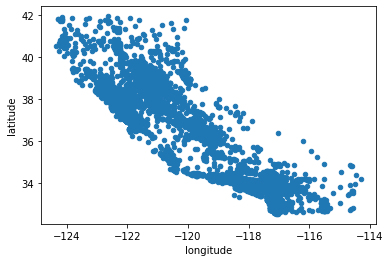

In [21]:
data.plot(kind="scatter", x="longitude", y = "latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

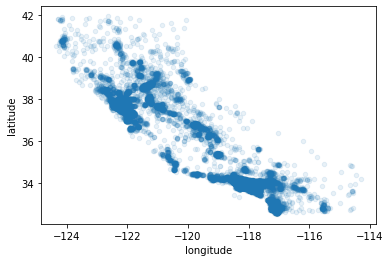

In [22]:
data.plot(kind="scatter", x="longitude", y = "latitude", alpha=0.1)

## aplha = 0.1 helps see the hight density areas 

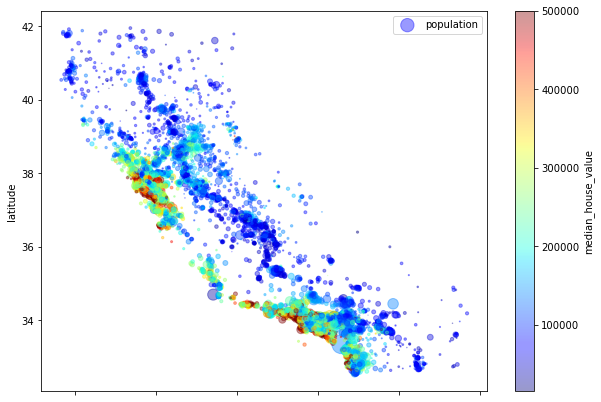

In [23]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s = data["population"]/100, label="population", figsize=(10,7),
         c="median_house_value", cmap=plt.get_cmap("jet"),colorbar= True, )
plt.legend()

## here we used a cmap where "s" represents the districts population and "c" represents price  and the jet is a predefined cmap which ranges from Blue(low values) to Red (high values)

In [24]:
corr_matrix = data.corr()


In [25]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

## here we named a correlation matrix to check the peasrson's coefficient of correlation,  and we're checking it with respect to the median house value

In [26]:
from pandas.plotting import scatter_matrix

In [27]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [28]:
attributes = ["median_house_value", "median_income", "housing_median_age", "total_rooms"]


array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot

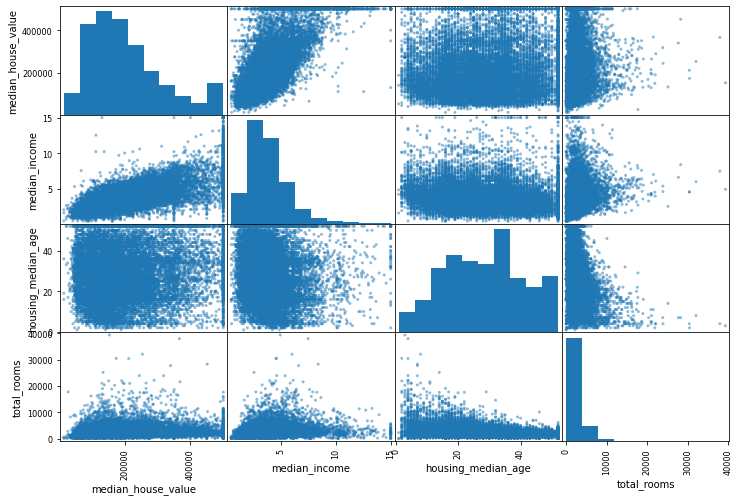

In [29]:
scatter_matrix(data[attributes], figsize=(12,8))

In [30]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"]= data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]= data["population"]/data["households"]

In [31]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [32]:
data= strat_train_set.drop("median_house_value",axis =1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data cleaning


In [33]:
data.drop("total_bedrooms",axis=1)
median = data["total_bedrooms"].median()
data["total_bedrooms"].fillna(median,inplace =True)


In [34]:
from sklearn.impute import SimpleImputer

In [35]:
imputer = SimpleImputer(strategy="median")

In [36]:
data_num = data.drop("ocean_proximity",axis=1)

In [37]:
data_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [38]:
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [39]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [40]:
X = imputer.transform(data_num)

## Handling Text and Categorical Attributes

In [41]:
data_cat= data["ocean_proximity"]
data_cat.head(10)

12655        INLAND
15502    NEAR OCEAN
2908         INLAND
14053    NEAR OCEAN
20496     <1H OCEAN
1481       NEAR BAY
18125     <1H OCEAN
5830      <1H OCEAN
17989     <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

In [42]:
res = np.array(data_cat)
res

array(['INLAND', 'NEAR OCEAN', 'INLAND', ..., '<1H OCEAN', '<1H OCEAN',
       'INLAND'], dtype=object)

In [43]:
data_ar = res.reshape(-1,1)
data_ar

array([['INLAND'],
       ['NEAR OCEAN'],
       ['INLAND'],
       ...,
       ['<1H OCEAN'],
       ['<1H OCEAN'],
       ['INLAND']], dtype=object)

In [44]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_ar)
data_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [45]:
data_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [46]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Feature Scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()
data_num = scaler.fit_transform(data_num)
data_num = pd.DataFrame(data_num, columns=['longitude','latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population','households','median_income'])

In [49]:
data_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.475534,0.329364,0.542224,0.066555,0.085686,0.039706,0.092422,0.232823
std,0.199385,0.227201,0.246565,0.054393,0.066174,0.031269,0.070145,0.131373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.148778,0.333333,0.036552,0.047358,0.021890,0.051718,0.142553
50%,0.581673,0.182784,0.549020,0.053747,0.069427,0.032540,0.075803,0.209766
75%,0.631474,0.550478,0.705882,0.079743,0.102932,0.048096,0.112024,0.292784
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
import seaborn as sns

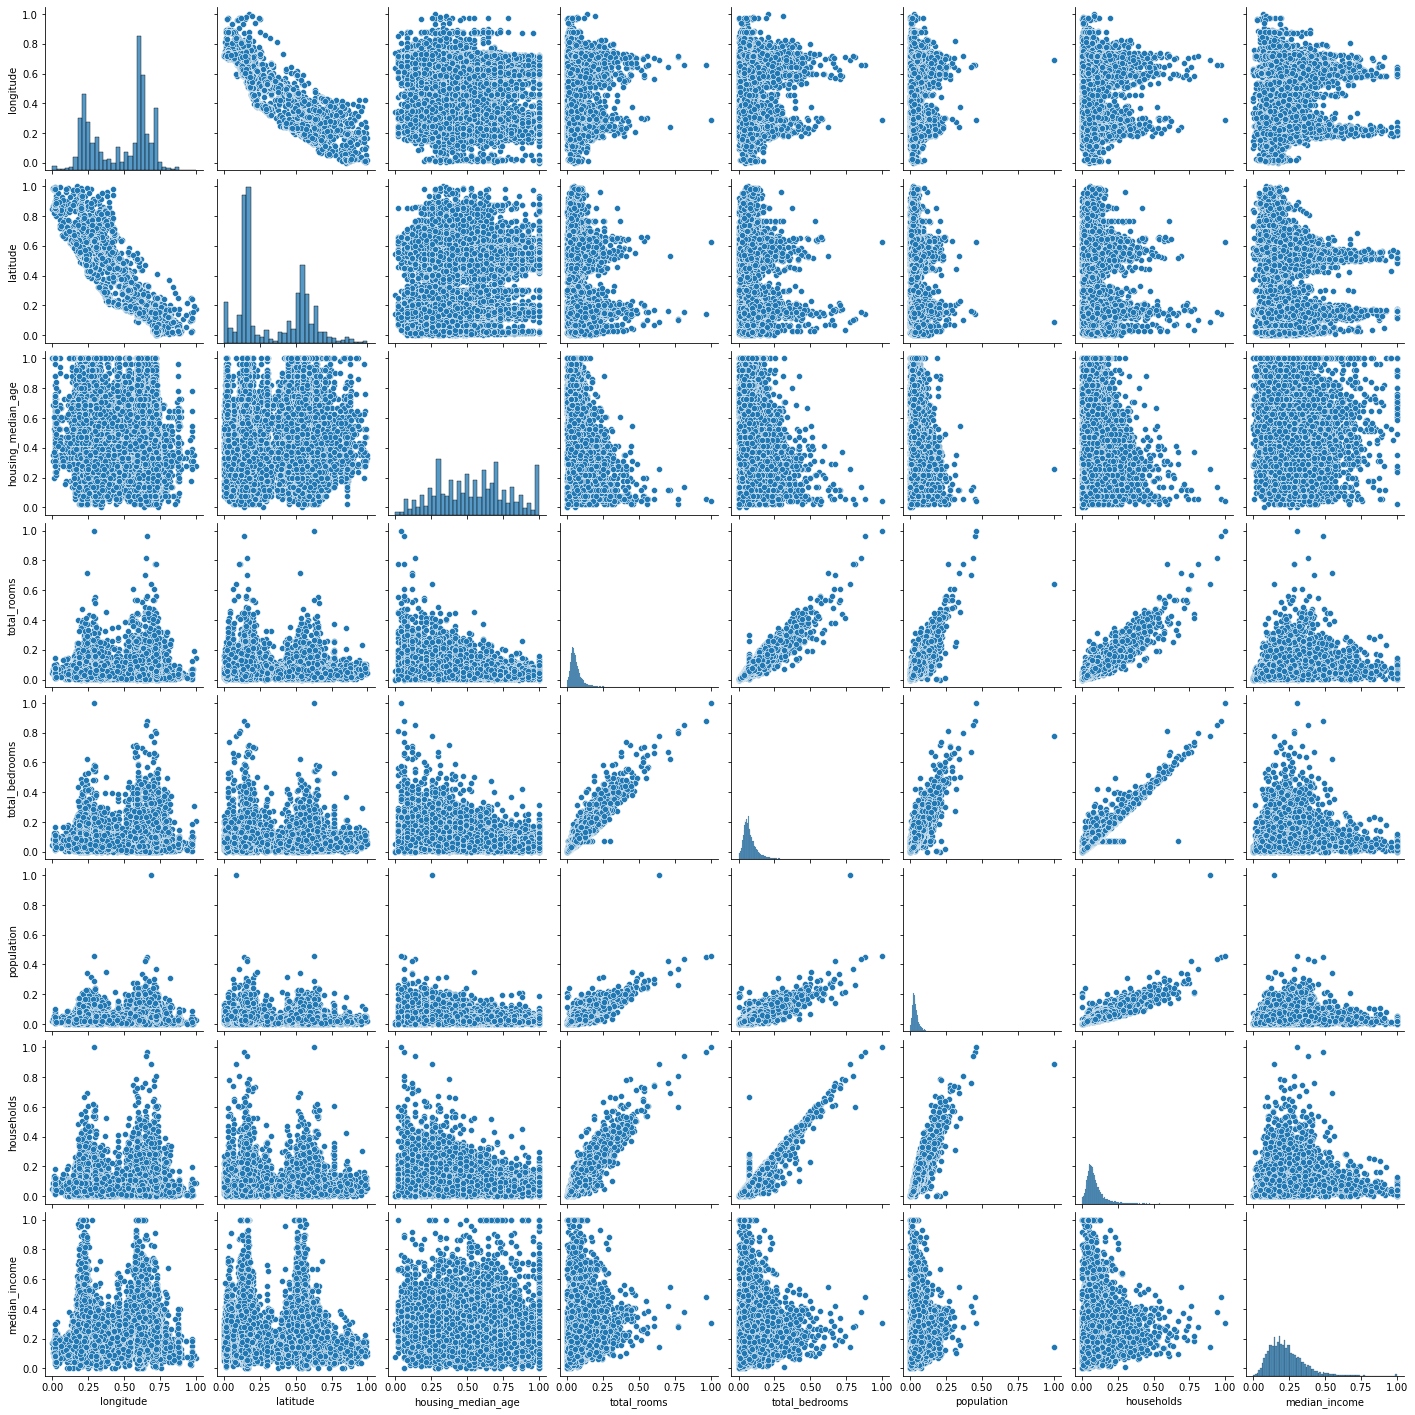

In [51]:
sns.pairplot(data_num)

## training a model


In [52]:
from sklearn.linear_model import LinearRegression

In [62]:
data_num.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798


In [74]:
lin_reg = LinearRegression()
lin_reg.fit(data_num, housing_labels)

LinearRegression()

In [78]:
ran_data = data.iloc[:5]
ran_labels = housing_labels.iloc[:5]
print("predictions", lin_reg.predict(data_num))

predictions [ 95459.68317105 293716.8121371  176469.51698334 ... 212117.64276272
 231198.64026482  93743.23797253]


In [79]:
print("Labels", list(ran_labels))

Labels [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [81]:
from sklearn.metrics import mean_squared_error
data_predictions = lin_reg.predict(data_num)
lin_mse = mean_squared_error(housing_labels, data_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69957.72079714121

In [84]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_num, housing_labels)

DecisionTreeRegressor()

In [85]:
data_predict = tree_reg.predict(data_num)

In [86]:
tree_mse = mean_squared_error(housing_labels, data_predict)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## it is quite evident that decision tree overfits the data quite intensely